In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
 # Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
 # Use the Citipy module to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []


# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
 # Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [8]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(0.5)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | traverse city
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | valera
Processing Record 5 of Set 1 | turukhansk
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | pathein
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | mandalgovi
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | bac lieu
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | fostoria
Processing Record 22 of Set 1 | anaheim
Processing Record 23 of Set 1 | tabiau

Processing Record 32 of Set 4 | marrakesh
Processing Record 33 of Set 4 | iqaluit
Processing Record 34 of Set 4 | synya
Processing Record 35 of Set 4 | bibiani
Processing Record 36 of Set 4 | vila franca do campo
Processing Record 37 of Set 4 | banda aceh
Processing Record 38 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 39 of Set 4 | burnie
Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | samusu
City not found. Skipping...
Processing Record 42 of Set 4 | santa cruz
Processing Record 43 of Set 4 | plouzane
Processing Record 44 of Set 4 | jamestown
Processing Record 45 of Set 4 | freeport
Processing Record 46 of Set 4 | meadow lake
Processing Record 47 of Set 4 | ternate
Processing Record 48 of Set 4 | barrow
Processing Record 49 of Set 4 | bonfim
Processing Record 50 of Set 4 | flic en flac
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | tayzhina
Processing Record 3 of Set 5 | khvoynaya
Processing Record 4 of Set 5 | meh

Processing Record 24 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 25 of Set 8 | champerico
Processing Record 26 of Set 8 | opuwo
Processing Record 27 of Set 8 | san matias
Processing Record 28 of Set 8 | mapiripan
Processing Record 29 of Set 8 | atar
Processing Record 30 of Set 8 | kautokeino
Processing Record 31 of Set 8 | muridke
Processing Record 32 of Set 8 | ukiah
Processing Record 33 of Set 8 | vestmanna
Processing Record 34 of Set 8 | sao felix do xingu
Processing Record 35 of Set 8 | yulara
Processing Record 36 of Set 8 | clonakilty
Processing Record 37 of Set 8 | san borja
Processing Record 38 of Set 8 | masallatah
Processing Record 39 of Set 8 | san quintin
Processing Record 40 of Set 8 | portland
Processing Record 41 of Set 8 | cidreira
Processing Record 42 of Set 8 | lodja
Processing Record 43 of Set 8 | rosario
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | nefteyugansk
Processing Record 46 of Set 8 | yen bai
Processing Record 47 

Processing Record 9 of Set 12 | auki
Processing Record 10 of Set 12 | manokwari
Processing Record 11 of Set 12 | pasni
Processing Record 12 of Set 12 | egvekinot
Processing Record 13 of Set 12 | aksay
Processing Record 14 of Set 12 | salamanca
Processing Record 15 of Set 12 | sorochinsk
Processing Record 16 of Set 12 | marcona
City not found. Skipping...
Processing Record 17 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 18 of Set 12 | wenling
Processing Record 19 of Set 12 | monrovia
Processing Record 20 of Set 12 | farafangana
Processing Record 21 of Set 12 | sitka
Processing Record 22 of Set 12 | morondava
Processing Record 23 of Set 12 | fort saint james
Processing Record 24 of Set 12 | nago
Processing Record 25 of Set 12 | braine-le-comte
Processing Record 26 of Set 12 | molepolole
Processing Record 27 of Set 12 | palmer
Processing Record 28 of Set 12 | edd
Processing Record 29 of Set 12 | dingle
Processing Record 30 of Set 12 | kavieng
Processing R

In [9]:
len(city_data)

558

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,79.03,93,97,5.99,HK,2022-05-14 08:19:14
1,Traverse City,44.7631,-85.6206,64.60,82,0,0.00,US,2022-05-14 08:23:35
2,Te Anau,-45.4167,167.7167,51.13,95,100,3.89,NZ,2022-05-14 08:23:35
3,Valera,9.3178,-70.6036,71.20,76,80,6.26,VE,2022-05-14 08:23:36
4,Turukhansk,65.8167,87.9833,59.14,71,100,4.88,RU,2022-05-14 08:23:36
5,Tuktoyaktuk,69.4541,-133.0374,23.94,90,98,10.02,CA,2022-05-14 08:23:37
6,Lompoc,34.6391,-120.4579,62.94,93,0,0.00,US,2022-05-14 08:23:37
7,New Norfolk,-42.7826,147.0587,62.92,74,72,3.00,AU,2022-05-14 08:23:37
8,Puerto Ayora,-0.7393,-90.3518,71.55,98,24,1.01,EC,2022-05-14 08:23:38
9,Pathein,16.7833,94.7333,93.76,48,70,13.73,MM,2022-05-14 08:23:38


In [11]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-05-14 08:19:14,22.2855,114.1577,79.03,93,97,5.99
1,Traverse City,US,2022-05-14 08:23:35,44.7631,-85.6206,64.60,82,0,0.00
2,Te Anau,NZ,2022-05-14 08:23:35,-45.4167,167.7167,51.13,95,100,3.89
3,Valera,VE,2022-05-14 08:23:36,9.3178,-70.6036,71.20,76,80,6.26
4,Turukhansk,RU,2022-05-14 08:23:36,65.8167,87.9833,59.14,71,100,4.88
5,Tuktoyaktuk,CA,2022-05-14 08:23:37,69.4541,-133.0374,23.94,90,98,10.02
6,Lompoc,US,2022-05-14 08:23:37,34.6391,-120.4579,62.94,93,0,0.00
7,New Norfolk,AU,2022-05-14 08:23:37,-42.7826,147.0587,62.92,74,72,3.00
8,Puerto Ayora,EC,2022-05-14 08:23:38,-0.7393,-90.3518,71.55,98,24,1.01
9,Pathein,MM,2022-05-14 08:23:38,16.7833,94.7333,93.76,48,70,13.73


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_df.count()

City          558
Country       558
Date          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
dtype: int64

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

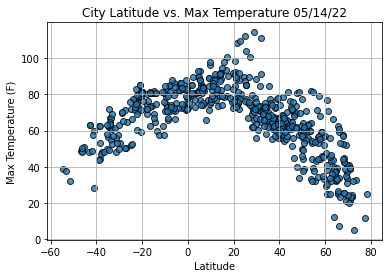

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

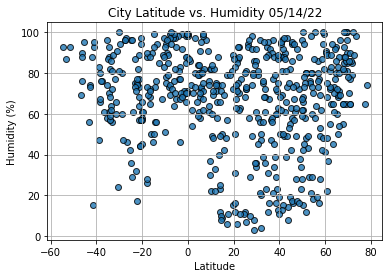

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

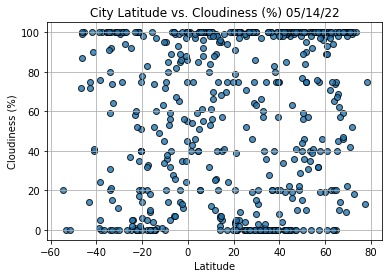

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

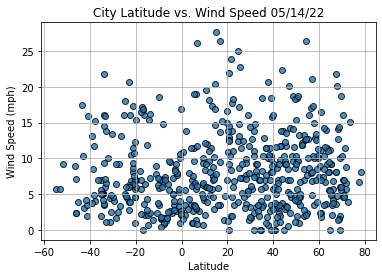

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2022-05-14 08:23:40
Lat                      -46.1927
Lng                      168.8643
Max Temp                    48.47
Humidity                       90
Cloudiness                     99
Wind Speed                   2.37
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
553    False
554     True
555    False
556     True
557    False
Name: Lat, Length: 558, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-05-14 08:19:14,22.2855,114.1577,79.03,93,97,5.99
1,Traverse City,US,2022-05-14 08:23:35,44.7631,-85.6206,64.60,82,0,0.00
3,Valera,VE,2022-05-14 08:23:36,9.3178,-70.6036,71.20,76,80,6.26
4,Turukhansk,RU,2022-05-14 08:23:36,65.8167,87.9833,59.14,71,100,4.88
5,Tuktoyaktuk,CA,2022-05-14 08:23:37,69.4541,-133.0374,23.94,90,98,10.02
...,...,...,...,...,...,...,...,...,...
548,Sorland,NO,2022-05-14 08:27:14,67.6670,12.6934,44.46,82,100,21.79
549,Camacha,PT,2022-05-14 08:27:14,33.0833,-16.3333,65.62,68,40,9.22
552,Abeche,TD,2022-05-14 08:27:15,13.8292,20.8324,91.42,25,0,4.61
554,Puerto Ayacucho,VE,2022-05-14 08:27:16,5.6639,-67.6236,74.23,95,100,3.31


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-05-14 08:19:14,22.2855,114.1577,79.03,93,97,5.99
1,Traverse City,US,2022-05-14 08:23:35,44.7631,-85.6206,64.60,82,0,0.00
3,Valera,VE,2022-05-14 08:23:36,9.3178,-70.6036,71.20,76,80,6.26
4,Turukhansk,RU,2022-05-14 08:23:36,65.8167,87.9833,59.14,71,100,4.88
5,Tuktoyaktuk,CA,2022-05-14 08:23:37,69.4541,-133.0374,23.94,90,98,10.02


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

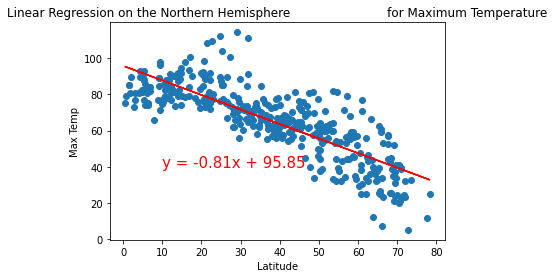

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

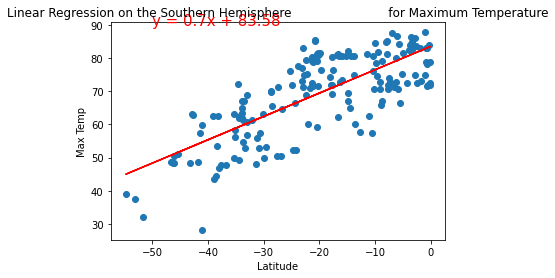

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

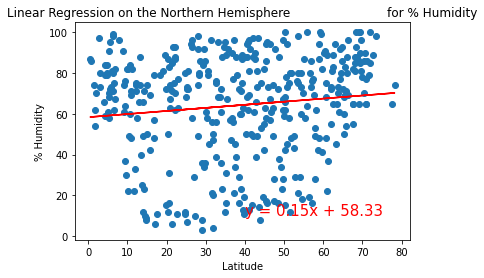

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

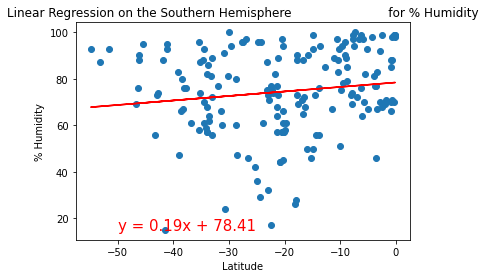

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

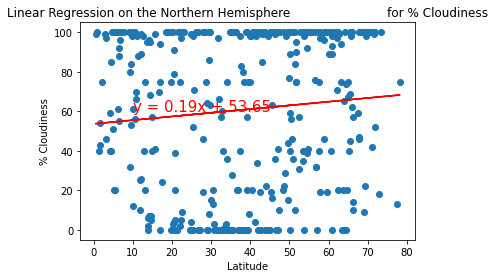

In [28]:
# Skill Drill: Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

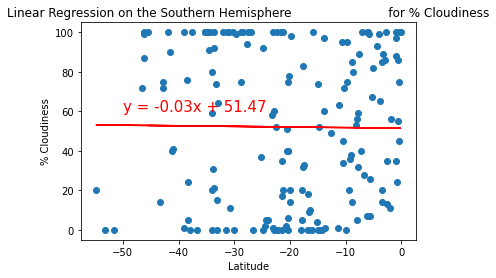

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

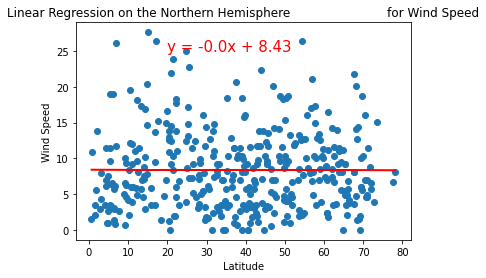

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,25))

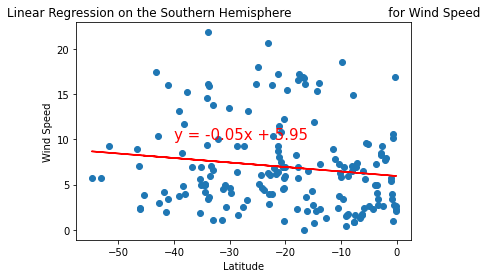

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,10))